# **Emotion Recognition Project**

**Phase 1: 40% has been completed**

**Deep Learning Model for Emotion Recognition**

In [1]:
!pip install opencv-python dlib keras tensorflow

In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2
import os
import dlib
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint

In [3]:
import kagglehub
!kaggle datasets download -d noamsegal/affectnet-training-data -p /content/data1

Dataset URL: https://www.kaggle.com/datasets/noamsegal/affectnet-training-data
License(s): Attribution-NonCommercial-ShareAlike 3.0 IGO (CC BY-NC-SA 3.0 IGO)
 98% 307M/314M [00:05<00:00, 75.8MB/s]
100% 314M/314M [00:05<00:00, 61.9MB/s]


In [4]:
!unzip /content/data1/affectnet-training-data -d /content/data1

Streaming output truncated to the last 5000 lines.
  inflating: /content/data1/sad/image0025659.jpg  
  inflating: /content/data1/sad/image0025666.jpg  
  inflating: /content/data1/sad/image0025673.jpg  
  inflating: /content/data1/sad/image0025679.jpg  
  inflating: /content/data1/sad/image0025681.jpg  
  inflating: /content/data1/sad/image0025693.jpg  
  inflating: /content/data1/sad/image0025694.jpg  
  inflating: /content/data1/sad/image0025697.jpg  
  inflating: /content/data1/sad/image0025715.jpg  
  inflating: /content/data1/sad/image0025725.jpg  
  inflating: /content/data1/sad/image0025726.jpg  
  inflating: /content/data1/sad/image0025730.jpg  
  inflating: /content/data1/sad/image0025736.jpg  
  inflating: /content/data1/sad/image0025753.jpg  
  inflating: /content/data1/sad/image0025760.jpg  
  inflating: /content/data1/sad/image0025761.jpg  
  inflating: /content/data1/sad/image0025769.jpg  
  inflating: /content/data1/sad/image0025774.jpg  
  inflating: /content/data1/sad

In [5]:

data_dir = "../content/data1"
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(48, 48),
    batch_size=32,
    label_mode='categorical'
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(48, 48),
    batch_size=32,
    label_mode='categorical'
)


AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.prefetch(buffer_size=AUTOTUNE)


Found 29042 files belonging to 8 classes.
Using 23234 files for training.
Found 29042 files belonging to 8 classes.
Using 5808 files for validation.


In [6]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
     Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(8, activation='softmax')
])

from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=50,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
        ModelCheckpoint('best_emotion_model.keras', save_best_only=True)
    ]
)



Epoch 1/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 308s 420ms/step - accuracy: 0.1872 - loss: 2.5806 - val_accuracy: 0.3571 - val_loss: 1.5537
Epoch 2/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 327s 427ms/step - accuracy: 0.3009 - loss: 1.7015 - val_accuracy: 0.4196 - val_loss: 1.4427
Epoch 3/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 361s 481ms/step - accuracy: 0.3544 - loss: 1.5752 - val_accuracy: 0.4597 - val_loss: 1.3518
Epoch 4/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 349s 436ms/step - accuracy: 0.3964 - loss: 1.4891 - val_accuracy: 0.4919 - val_loss: 1.2846
Epoch 5/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 317s 436ms/step - accuracy: 0.4348 - loss: 1.4173 - val_accuracy: 0.5071 - val_loss: 1.2561
Epoch 6/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 324s 439ms/step - accuracy: 0.4477 - loss: 1.3754 - val_accuracy: 0.5201 - val_loss: 1.2128
Epoch 7/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 319s 435ms/step - accuracy: 0.4700 - loss: 1.3380 - val_accuracy: 0.5348 - val_loss: 1.1933
Epoch 8/50
727/727 ━━━━━━━━━━━━━━━━━━━━ 320s 433ms/step - accuracy: 0.4817 -

In [8]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
# Load the trained model
model = load_model('../content/best_emotion_model.keras')



# Now you can evaluate or continue training the model
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(val_dataset)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


182/182 ━━━━━━━━━━━━━━━━━━━━ 19s 101ms/step - accuracy: 0.6410 - loss: 0.9755
Test Loss: 0.9654638767242432
Test Accuracy: 0.6394628286361694


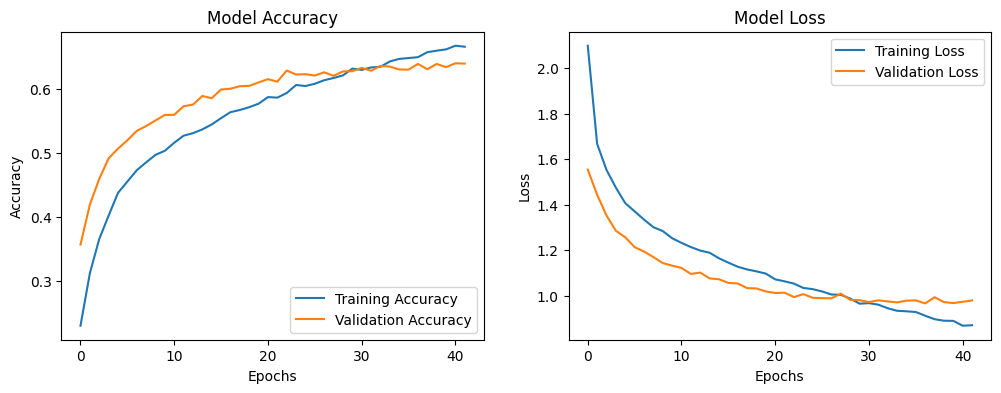

In [10]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

plot_history(history)
